In [1]:
from math import factorial
import numpy as np
from numpy import sqrt, sin, cos, pi, exp, log
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
"constants"
h = 6.626e-34    #m^2kg/s
c = 3e8          #m/s^2
eV = 1.602e-19   #electronvolt
m_e = 9.11e-31   #electron mass
ep_0 = 8.854e-12 # empty space

Question 1
==========

***a)***    For $I_1 < I_s$ the input signal $I_1$ grows exponentially, or linearly in logscale. Due to population saturation, as $I_1 \rightarrow I_s$. The rate of signal instensity growth of $I_1$ reduces due to saturation. This in turn affects the output signal $I_2$, as it would reach 0 overtime due to this saturation as shown in $I_2/I_s$ over $I_2/I_s$ graphs. 

***b)***    The values of the gain was given at different intensities:

$$
G_1(I_1 = 100 W/m^2) = 10dB
\\G_2(I_2 = 200 W/m^2) = 9dB
$$

The equation to find saturation intensity, $I_s$, from input intensity, $I_1$ can be found via the following:

$$
\frac{I_1}{I_s} = \frac{1}{G_1-1}\ln(\frac{G_0}{G_1})
\\ \implies I_s = \frac{I_1(G_1-1)}{\ln(G_0/G_1)}
$$

Two different intensities were given for different values of gain. This means to find $I_s$, this saturation function must equal for each given intensities, $I_1,I_2$. This must be done numerically.

$$
I_s^1 = \frac{I_1(G_1-1)}{\ln(G_0/G_1)}
\\ I_s^2 = \frac{I_2(G_2-1)}{\ln(G_0/G_2)}
\\ I_s^1 = I_s^2
$$

But before $I_s$ can be found, both equations must intersect for a given $G_0$. Note that $1<G<G_0$, hence $G_0 > 10$ for both. To find this, create a new function as the difference between the saturation functions $I_s^1,I_s^2$ and find the root. 

$$
f(G_0) = I_s^1(G_0) - I_s^2(G_0)
$$

This value of $G_0$ satisfies the equality $I_s^1 = I_s^2$. Both saturation would have different curves but the point of intersection would give $I_s$ under the conditions given. Solving this numerically gives:

$$
I_s = 6.6kW/m^2
$$

/tmp/ipykernel_11103/3522693218.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  G_root = float(sp.optimize.fsolve(f,10.22))    #G_0 > 10
/tmp/ipykernel_11103/3522693218.py:5: RuntimeWarning: divide by zero encountered in divide
  I1s = lambda G_0: 100*(10-1)/log(G_0/10)        # Saturation Intensity Function for I = 100W/m^2


11.450674231634785


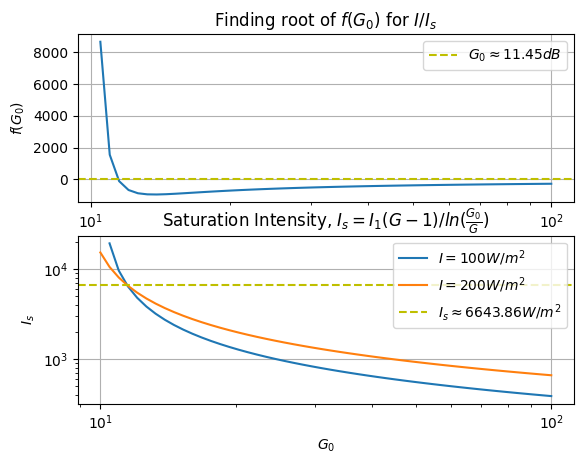

In [45]:
"""Question 1"""

## create functions of saturation intensity as a functino of G_0

I1s = lambda G_0: 100*(10-1)/log(G_0/10)        # Saturation Intensity Function for I = 100W/m^2
I2s = lambda G_0: 200*(9-1)/log(G_0/9)          # Saturation Intensity Function for I = 200W/m^2
G_0 = np.logspace(1,2)

## create a difference function to find the root, giving the common G_0

f = lambda G_0: I1s(G_0) - I2s(G_0)
G_root = float(sp.optimize.fsolve(f,10.22))    #G_0 > 10
print(G_root)

## plot the graphs
# root of difference function
plt.subplot(211)
plt.semilogx(G_0, f(G_0))
plt.axhline(y=G_root, color='y', linestyle='--', label = f'$G_0 \\approx {round(G_root,2)}dB$')
plt.xlabel('$G_0$')
plt.ylabel('$f(G_0)$')
plt.title('Finding root of $f(G_0)$ for $I/I_s$')
plt.legend()
plt.grid()
# given Saturation functions 
plt.subplot(212)
plt.loglog(G_0, I1s(G_0), label = '$I=100W/m^2$')
plt.loglog(G_0, I2s(G_0), label = '$I=200W/m^2$')
plt.axhline(y=6643.86, color='y', linestyle='--', label = f'$I_s \\approx {round(I1s(G_root),2)}W/m^2$')
plt.legend()
plt.xlabel('$G_0$')
plt.ylabel('$I_s$')
plt.title('Saturation Intensity, $I_s = I_1(G-1)/ln(\\frac{G_0}{G})$')
plt.grid()
plt.show()
# formal saturation graph
# I1_Is = lambda G: 1/(G-1)*log(G_root/G)
# I2_Is = lambda G: G*I1_Is(G)
# G = np.logspace(0,6)
# plt.subplot(313)
# plt.loglog(I1_Is(G),I2_Is(G), label = 'power curve')
# plt.loglog(I1_Is(G), I1_Is(G)*G_root, label = f'$G_0 = {G_root}dB$')
# plt.loglog(I1_Is(G), I1_Is(G), label = '$G = 1dB$')
# plt.loglog(I1_Is(G), I1_Is(G))
# #plt.legend()
# plt.xlabel('$\\frac{I_{in}}{I_{sat}}$')
# plt.ylabel('$\\frac{I_{out}}{I_{sat}}$')
# plt.grid()
# plt.show()


Question 2
==========

***a)***    If assumed beam is collimated, no need to check for diffraction within the gain medium as it would be negligable. To neglect decrease in lower state population, this implies that $N_1 = N, N_2 = 0$. Note that $c=λν$, $I=P/σ_a$. Hence, using the Rate Equations:

$$
-\frac{dN_1}{dt} = \frac{dN_2}{dt} = 0
\\ \implies \frac{dN_2}{dt} = R_p - N_2/τ_2 - \frac{Iσ_a}{hν}[N_2-N_1]
\\ R_p = N\frac{Iσ_a}{hν}
\\ R_p = N\frac{λP}{hc}
$$

For input plane pump rate at $z=0$, $R_p = 1.29e23 photons/s/m^3$.

***b)***    Since $P(z) = 10e^{-αz}$, the pump rate would also be dependent on distance of the pump laser from the gain medium. The graph is shown below from code, and as expected an exponential decay due to the power.

***c)***    At equilibrium, the Rate Equations are still zero but the population would have inverted. Hence, $N_2 = 1/2N_1$. Since $V = l*σ_a$, the population density of the upper state on average is $Density \bar{N_2} = N_2/V = 1.01e11 photons/m^3$. 

For small signal gain, the inequality $I << I_s$ must uphold. This was found numerically for $I(z) \approx 0$ to find the distance $z$, and using this value gives $γ_0 = R_pτ_2σ_a = 4.43e9$, where $R_p(z)$ is a value proportional to the value of $I(z)$ where it is smallest. However this results in an unreasonable value of distance. Hence, instead let:

$$
γ_0 = R_pτ_2'σ_a
\\ τ_2' = τ_2/(I_s + I(z=0))
\\ \therefore γ_0(z=0) = 3.06e7
$$

About the same number at a reasonable distance.

***d)***    Energy stored in the upper state, $E_2 = hc/λ = 1.17eV$, where $λ = 1064nm$. This is the wavelength the photon must emit when it is decaying from $E_2$ and going back down to ground state or another lower energy state. 

***e)***    Calculating the threshold pump power and Optimum Output Coupler:

$$
P_{thres} = I_sA/2(\ln(\frac{1}{R_1R_2}))
\\ P_{thres} = 1.55e-17W
\\
\\ T_{opt} = L[\sqrt(\frac{2γ_0l}{L})-1]
\\ T_{opt} \approx 55, z = 0m
$$

Where $A = σ_a$ as the area of the laser mode and $l=5mm$ the length of the gain medium. However, $T_{opt} \in (0,1)$ and cannot be more than 1. Since the values $L = 0.01, l=5mm$, the only affecting variable must be $γ_0$. Readjust the value of $R_p(z)$ until the $T_{opt}$ is within this range for $z=808m$ gives $γ_0 = 9.48e3$ and $T_{opt} = 0.96 < 1$. Although the distance is still large and unreasonable, $T_{opt}$ is within bounds.

***f)*** Average power of the output laser can be found by first finding the power of the output itself:

$$
P_{out} = σ_s(P_{in} - P_{Thres}),  P_{in} = 10e^{-αz}
\\ ο_s = T/(T+L),       
$$

With the assumption all other efficency factors are 1 for $σ_s$. Since $P_{out}$ is a function over distance, only have to concern on which index of $z = 808m$ was for $P(z)_{in}$ to satisfy the $T_{opt}$ condition. In this case the index was 80. The average also needs to not be found since it is not a sum over several distances. The average power of the laser is $P_{out} = 0.03W$ for $z = 808m$ of pump laser incident from gain medium. This gives the maximum energy per pulse to $E_p = P_{avg}/PRF = P_{avg}/(1/2τ_2) = 250J$. This is fairly high for a single pulse of laser, so it is likely to be wrong. Assume that the Pulse Repetition Rate is inverse of twice the photon lifetime expectancy in $E_2$, $τ_2$. Since the inverted population does not grow for longer than any multiple larger than $2τ_2$, it would be a waste to let the population grow for any longer. This near completely depleates the population inversion on $N_2$.

***g)*** According to the following code and reasoning from this question, the power output does increase tenfold.

Input plane pump rate: 1.29e+23 photons/s/m^3
N2 population density = 1.01e+11
Small signal gain = 9483.0803446501
Energy to produce a λ = 1064nm photon = 1.17eV
Threshold Pump Power = 1.55e-17W
Transmittance of Optimum Output < 1, 0.96
Average Power Output = 0.03W
Maximum Energy per Pulse = 250.46J


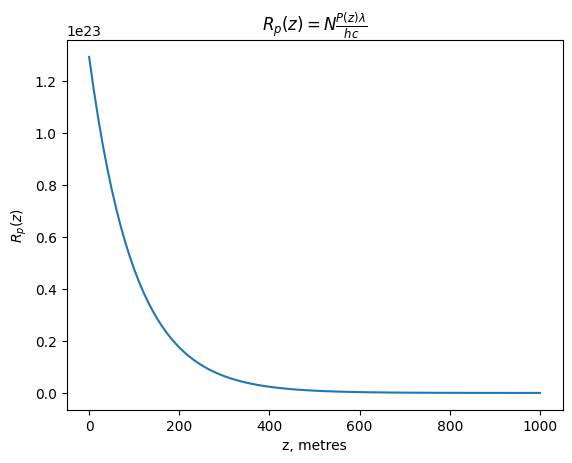

In [4]:
"""Question 2"""
## Given constants

τ2 = 240e-6         #μs
α = 1e-2            #cm^1
l = 5e-3            #mm, length of gain
λ = 808e-9          #nm
λ_lase = 1064e-9    #nm, lasing wavelength
ω0 = 1e-3           #mm, beam waist radius
σ_α = pi*ω0**2      #m^2, pump absorption cross section. Assume circular due to collimated beam
N = α/σ_α           #number of photons in ground state

## Calculated constants & functions
points = 100
z = np.linspace(0,1e3,points)
P = lambda z: 10*exp(-α*z)
Is = h*c/(σ_α*τ2*λ)
I = lambda z: P(z)/(σ_α)        # I = W/m^2

"Qa"
Rp = N*(P(z)*λ)/(h*c)                                   # highest photon count, from rate equation dN2/dt = 0
#Rp = 2*(Is + P)/(N2*τ2) | #Rp = N2*(Is + I)/τ2         # N2(t -> 1e100), wrong derivation                   
#Rp = α/(2*τ2*pi*ω0**2)                                 # N2 = τ2Rp, no photon feedback
print(f'Input plane pump rate: {"{:.2e}".format(Rp[0])} photons/s/m^3')

"Qb"
## Create pump rate plot along z-axis
plt.plot(z,Rp)
plt.ylabel('$R_p(z)$')
plt.xlabel('z, metres')
plt.title('$R_p(z) = N \\frac{P(z)λ}{hc}$')

"Qc"
## Find N2 pop-density & small-signal gain when at equilibtrium dN2/dt = dN1/dt = 0
ρN2 = 1/2*N/(l*σ_α)         # N2 = 1/2N at pop-inversion
print(f'N2 population density = {"{:.2e}".format(int(ρN2))}')

# small signal gain when I << Is, redo z-axis and get smallest value for I at the last index
# z = np.logspace(0,5,points)
# plt.subplot(212)
# plt.loglog(z,I(z), label = 'I(z)')
# plt.axhline(y = Is, color='y', linestyle='--', label = f'$I_s = {"{:.2e}".format(Is)}W/m^2$')
# plt.xlabel('z')
# plt.ylabel('$I(z) = P(z)/σ_a$')
# plt.legend()
# plt.show()

τ2_prime = τ2/(Is + I(z)[0])
γ0 = Rp[80]*τ2_prime*σ_α           # small signal gain for Rp(I~0, for I << Is))

print(f'Small signal gain = {γ0}')

"Qd"
## Energy in E2
E2 = h*c/λ_lase
print(f'Energy to produce a λ = 1064nm photon = {"{:.2f}".format(E2/eV)}eV')

"Qe"
## Find threshold pump power

R1 = exp(-0.01)     # ln(1/R1) = L = 1%
R2 = 0.98
T = log(1/R2)
L = log(1/R1)

# Rpt = log(1/(R1*R2))* 1/(2*l*τ2*σ_α)
# Rpt2 = log(1/(R1*R2))* Is*λ/(2*l*h*c)
# print(f"Rp, Threshold = {Rpt}")
# print(f"Rp, Threshold using Saturation Intensity = {Rpt2}")

P_thres = Is*σ_α/2*log(1/(R1*R2))       # A = σ_a, area of mode. Assume mode of laser is Gaussian
T_opt = L*(sqrt(2*γ0*l/L)-1)            # cannot get this value any less than 1 unfortunately
print(f'Threshold Pump Power = {"{:.2e}".format(P_thres)}W')
print(f'Transmittance of Optimum Output < 1, {"{:.2f}".format(T_opt)}')

"Qf"
## Find Average Output Power & Pulse Repitition Frequency for Energy per Pulse
σ_s = T/(T + L)                         # assume efficiency terms are all 1
P_out = lambda z: σ_s*(P(z) - P_thres)
P_out_avg = P_out(80)/points
print(f'Average Power Output = {"{:.2f}".format(P_out_avg)}W')

# t = np.linspace(0,τ2*4)
# N = Rp[0]*τ2*(1-exp(-t/τ2))
# plt.plot(t,N)
# plt.ylabel('$N(t)$')
# plt.xlabel('Pulse Pump Duration, $T_p$')
# plt.title('$N(t) = R_pτ_2(1-exp(-t/τ_2))$')


E_p = P_out_avg/(1/2*τ2)                    # assumption PRF = 1/2τ2, as 2τ2 time is needed to build up population inversion and completely deplete
# P_p = E_p/50e-9                           # assume Δt of pulses are maximum 50 nanoseconds  
# E_max = P_p/τ2
# print(f'Maximum Energy per Pulse = {E_max}')
print(f'Maximum Energy per Pulse = {"{:.2f}".format(E_p)}J')




Question 3
==========

To find the minimum pump rate required such that no absorption or emission occurs, this is an equilibrium state. Hence use the expression for $dN_2/dt = 0$:

$$
R_p = N\frac{λP}{hc}
$$

The lase region of interest is between $ΔE = E2 - E1 = 10327cm^{-1} - 612cm^{-1} = 9715cm^{-1}$. This can also be considered as the wave number, $\bar{ν} = 1/λ$, which would be required for Boltzmann Satistics. Note also that $kT = 208cm^{-1}, T = 300K$ and this is not a property of Yb:YAG specifically but is a constant. However, since $E > kT$ greatly, nearly all of the electrons would be in the ground state, $N$. This is supported by the calculation below. 

Given that the Yb concentration is $8.3e^{20}/cm^3$, then by safe assumption $N = 8.3e^{30}$ since the units used are in $cm$. Assume volume is per unit centimeter cubed. Now to find power of this wavelength is given by the generic form, $P = ΔE/τ_2 = hλ/τ_2 = 4.26e{-16}eV$. Highly miniscule. 

$$
\therefore R_p = 2.93e^7 photons/s/cm^3
$$

In [5]:
"""Question 3"""
## given constants
ΔE = 9715        # cm^-1
λ = 1/ΔE         # whatever dimension ΔE is
kT = 208         # cm^-1
τ2 = 1e-3        # seconds
N = 8.3e20       # atoms/cm^3

f2 = exp(-ΔE/kT)/(1+exp(-ΔE/kT))
print(f'Probablility of atoms in upper state, E2 = {f2}')
print(f'Probablility of atoms in lower state, E1 = {1-f2}')

ΔE = h*λ
P = ΔE/τ2
print(f'Power of emitted photon, P = {"{:.2e}".format(P/eV)}')

Rp = N*(P*λ)/(h*c)
print(f'Minimum Pump Rate, Rp = {"{:.2e}".format(Rp)}')

Probablility of atoms in upper state, E2 = 5.194270460717924e-21
Probablility of atoms in lower state, E1 = 1.0
Power of emitted photon, P = 4.26e-16
Minimum Pump Rate, Rp = 2.93e+07


Question 4
==========

***a)*** Free Spectral Range of the resonator is given by:

$$
Δν_{FSR} = \frac{c}{2nl}
\\ = 250MHz
$$

Where $n = 1.5$, $l = 0.4m$.

***b)*** The number of modes is calculated in 1D. This is under the assumption that the wire is a 1D system, with the length being the x-axis. Considering in 1D gives:

$$
N_{1D} = ν/Δν_{FSR}
\\ = 800 000 modes
$$

Where $ν = 200THz$, which is the gain centre frequency of the gain medium. As in, the gain medium operates optimumly for frequencies of $200THz$.

***c)*** The graph is provided below. Since each FSR frequency is in the MHz range whereas the scale of frequencies of interest is in THz range, the minimum & maximum integers $q$ must be established. Since the Gaussian was created first, the integers were found via:

$$
q_min = 100THz/Δν_{FSR}
\\ q_max = 300THz/Δν_{FSR}
$$

Since the integers would also be too close to distinguish one another, the start and end of these integers took stepps of $1e^5$ to space them out. The Gaussian was formed via the general form of the Gaussian and hence the amplitude is undefined.

***d)*** To find the PRF, FSR may be needed. By definition, the FSR is related to the distance between periodic peaks of transmission within an optical cavity. PRF by definition is also the pulse frequency shot from the laser. By this relation, consider the Pulse Repitition Rate equal to the Free Spectral Range frequency, in order to pump out pulses in time:

$$
PRF = Δν_{FSR} = 250MHz
$$

***e)*** Changing axes from frequency to time indicates the usage of the Fourier Transform. The Fourier Transform of a Gaussian is a Gaussian, where the standard deviation $F{σ} = 1/σ$ in time space. After adjusting the axes to get the entire shape into view, the expected Mode-locked envelope is displayed. The modes must add up to fit this envelope, and this would arise a sinc function with smaller amplitudes beside the main Gaussian due to the interference between the modes. How to implement that code, I do not know yet.

***f)*** From the humble $P=E/t$, given the values $E = 50nJ, t = 20fs$ gives the value $P = 2.5μW$. This can be done if assumped the pulse being a flattop, essentially being a box function.

***g)*** If you take the form of a Gaussian and house it within the box function, then the average power of this mode-locked laser must still be $P_{avg} = 2.5μW$.

FSR of frequency = 2.50e+08Hz
Number of Modes = 800000
Peak Power in flattop pulses, 2.50e-06


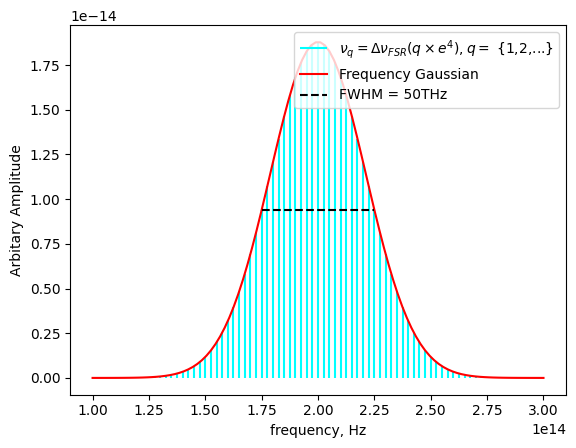

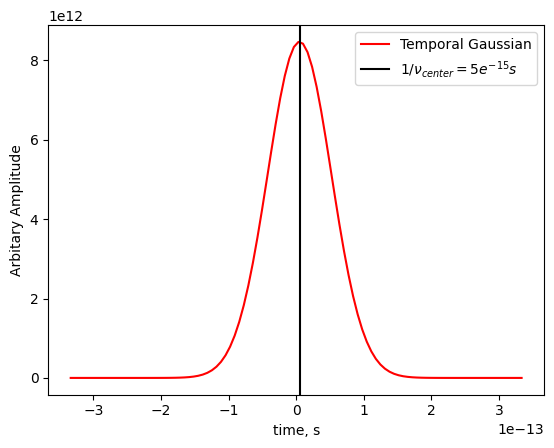

In [6]:
"""Question 4"""
## given constants
ν_center = 200e12           #THz, accepted frequency in gain centre
l = 0.4                     #m
n = 1.5                     # refractive index
gain_band = 50e12           #THz, gain bandwidth where  

"Qa"
## find FSR of the resonator
FSR_ν = c/(2*n*l)
print(f'FSR of frequency = {"{:.2e}".format(FSR_ν)}Hz')

"Qb"
## number of modes able to be lased in cavity, assuming system is 1D as it is along a wire
N = int(ν_center/FSR_ν)
print(f'Number of Modes = {N}')

"Qc"
## plot the spectrum of the output, gain centre @ 200THz with FWHM at 50THz
# assuming meant the FSR spectrum, but that is just lines given integers. 
points = 100
ν = np.linspace(100e12,300e12,points)
σ = gain_band/(2*sqrt(2*log(2)))    #standard deviation of the gaussian
Gauss = lambda ν: 1/(σ*sqrt(2*pi))*exp( -(ν - ν_center)**2/(2*σ**2) )

# starting value of FSR
q_start = int(100e12/FSR_ν)
q_end = int(300e12/FSR_ν)

plt.figure()
for q in range(q_start,q_end,10000):    # to fit lines within domain of interest instead starting at frequency = 0Hz
    νq = FSR_ν*q                       # to scale the factors of q appropriately so they do not stick together, since the FSR is in MHz and scale is in THz
    plt.vlines(x = νq, ymin = 0, ymax = Gauss(νq), color='cyan', linestyle='-')

plt.vlines(x = νq, ymin = 0, ymax = Gauss(νq), color='cyan', linestyle='-', label = '$ν_q = Δν_{FSR}(q \\times e^4), q = $ {1,2,...}')
plt.plot(ν,Gauss(ν), color = 'red',  label = 'Frequency Gaussian')    
plt.hlines(y = 1/2*Gauss(ν)[50], xmin = 175e12, xmax = 225e12, color='black', linestyle='--', label = f'FWHM = 50THz')
plt.xlabel('frequency, Hz')
plt.ylabel('Arbitary Amplitude')
plt.legend(loc = 'upper right')

"Qe"

σ = 1/σ
t = np.linspace(-1/300e10,1/300e10,points)
Gauss = 1/(σ*sqrt(2*pi))*exp( -(t - 1/ν_center)**2/(2*σ**2) )

plt.figure()
plt.plot(t,Gauss, color = 'red',  label = 'Temporal Gaussian')    
plt.axvline(x = 1/ν_center, color = 'black', label = '$1/ν_{center} = 5e^{-15}s$')
plt.xlabel('time, s')
plt.ylabel('Arbitary Amplitude')
plt.legend()
"Qf"

E = 50e9        # nJ
t = 20e15       # fs
P = E/t

print(f'Peak Power in flattop pulses, {"{:.2e}".format(P)}')

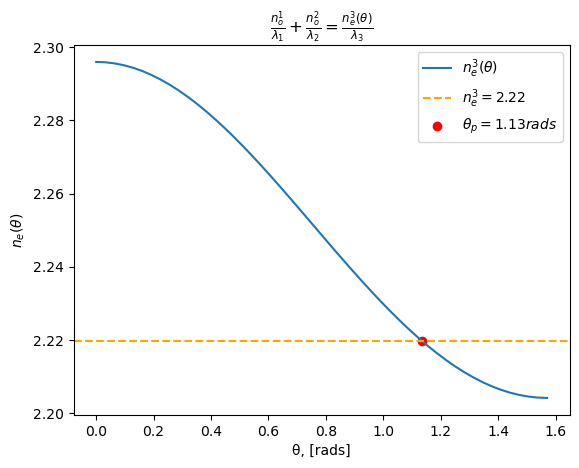

In [ ]:
"Question 1"

def n(λ,A,B,C,D,E,F):
    return sqrt( A*λ**2/(λ**2 - B) + C*λ**2/(λ**2 - D) + E*λ**2/(λ**2 - F) + 1 )

# Sellmeirer coefficients for n_e, n_o respectively
# Note that LiBnO n_0 > n_e
# for Type I (+)-uniaxial, (λ1,λ2,λ3) -> (e,e,o)
nconst_o = ( 2.4272, 0.01478, 1.4617, 0.05612, 9.6536, 371.216 )
nconst_e = ( 2.2454, 0.01242, 1.3005, 0.05313, 6.8972, 331.33 )

# n_e & n_o for 1064nm
no_1064 = n(1.064,*nconst_o)
ne_1064 = n(1.064,*nconst_e)

# n_e & n_o for 1319nm
no_1319 = n(1.319, *nconst_o)
ne_1319 = n(1.319, *nconst_e)

# n_e & n_o for 588nm
no_588 = n(0.588,*nconst_o)
ne_588 = n(0.588,*nconst_e)

# evaluate expected no_3 for wavelength_3 & find such phase angle
θ = np.linspace(0,pi/2)

ne_3 = 0.588*( no_1064/1.064 + no_1319/1.319 )
nθ_3 = lambda theta: sqrt( ( sin(theta)**2/(ne_588**2) + cos(theta)**2/(no_588**2) )**-1 )
Δk = lambda theta: nθ_3(theta) - ne_3

phase_matched = sp.optimize.newton(Δk, x0=pi/4)

plt.plot(θ, nθ_3(θ), label = '$n_e^3(\\theta)$')
plt.axhline(y = ne_3, ls = '--', color = 'orange', label = f'$n_e^3 = {round(ne_3,2)}$')
plt.scatter(phase_matched, ne_3, color = 'red', label = f'$\\theta_p = {round(phase_matched,2)} rads$')
plt.xlabel('θ, [rads]')
plt.ylabel('$n_e(θ)$')
plt.title('$ \\frac{n_o^1}{λ_1} + \\frac{n_o^2}{λ_2} = \\frac{n_e^3(θ)}{λ_3}$')
plt.legend()
plt.show()

0.1071155404872286


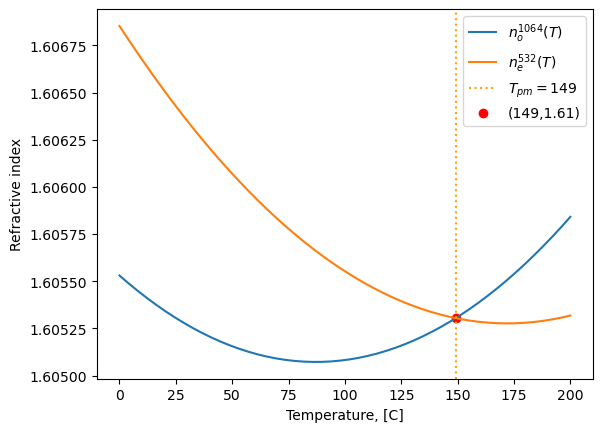

In [146]:
"Question 2"

# For LBO, a (-) biaxial crystal.

# n(T) = delta_n + n(T0) 

def n(λ,A,B,C,D,E,F):
    return sqrt( A + B/(λ**2 - C) - D*λ**2 + ( E*λ**4 - F*λ**6)*10**-5 )

def n_T(λ,T,A_T,B_T,C_T,A,B,C,D,E,F, T0 = 20):
    return (A_T*λ - B_T)*10**-6 * ((T-T0) - C_T*(T-T0)**2) + n(λ,A,B,C,D,E,F)

# negative uniaxial crystal, so 1064 is o-ray & 532 is e-ray
# since 1064 is polarised in the z-plane, it faces refractive index in z-direction. Hence, use Δn_z
# since 532 is polarised in the y-plane, it faces refractive index in y-direction. Hence, use Δn_y

nconst_y = (2.5390,0.01277,0.01189,0.01849,4.3025,2.9131)
nconst_z = (2.5865,0.01310,0.01223,0.01862,4.5778,3.2526)
ny_params_T = (6.01,19.40,32.89e-4)
nz_params_T = (1.50,9.70,74.49e-4)

# need to solve ne_532 = no_1064

ne_532 = lambda T: n_T(0.532,T,*ny_params_T,*nconst_y)
no_1064 = lambda T: n_T(1.064,T,*nz_params_T,*nconst_z)

# expected temperature
T_pm = lambda λ: ( -1.8933*λ**4 + 8.8866*λ**3 - 13.0198*λ**2 + 5.4015*λ + 0.8639)*10**3
T_pm_root = sp.optimize.newton(lambda x: no_1064(x)-ne_532(x), x0=100)
print(abs(T_pm(1.064) - T_pm_root))

T = np.linspace(0,200)  # celcius
plt.plot(T, no_1064(T), label = '$n_o^{1064}(T)$')
plt.plot(T, ne_532(T), label = '$n_e^{532}(T)$')
plt.axvline(x = T_pm(1.064), ls = ':', color = 'orange', label = '$T_{pm} =$' f'{int(T_pm(1.064))}' )
plt.scatter(T_pm_root, ne_532(T_pm_root), color = 'red', label = f'({int(T_pm_root)},{round(ne_532(T_pm_root),2)})')
plt.xlabel('Temperature, [C]')
plt.ylabel('Refractive index')
plt.legend()

In [ ]:
"Question 3"

def n(λ,A,B,C,D,E,F):
    return sqrt( A*λ**2/(λ**2 - B) + C*λ**2/(λ**2 - D) + E*λ**2/(λ**2 - F) + 1 )

# Sellmeirer coefficients for n_e, n_o respectively
# Note that PPLN n_0 > n_e
# No Type of phasematching, only stated e-polarised waves
# hence all waves are facing n_e

# from refracticeindex.com @ 21C
nconst_o = ( 2.6734, 0.01764, 1.2290, 0.05914, 12.614, 474.60 )
nconst_e = ( 2.9804, 0.02047, 0.5981, 0.0666, 8.9543, 416.08 )

# n_e & n_o for 1064nm
no_1064 = n(1.064,*nconst_o)
ne_1064 = n(1.064,*nconst_e)


# n_e & n_o for 1319nm
no_1319 = n(1.319, *nconst_o)
ne_1319 = n(1.319, *nconst_e)

# n_e & n_o for 588nm
no_588 = n(0.588,*nconst_o)
ne_588 = n(0.588,*nconst_e)

print(ne_1064, ne_1319, ne_588)

k = 2*pi*np.array( [ne_1064/1.064, ne_1319/1.319, ne_588/0.588] )
delta_k = k[2] - (k[0] + k[1])
print(delta_k)
L_c = pi/delta_k
print(f'Coherence length @ 21C: {round(L_c,2)}um')
print(f'Lowest order poling period for efficient quasi phase matching: {round(2*L_c,2)}um')

# find efficiency, all units must be in meters
ep_0 = 8.85418e-12
L = 20e-3
d_eff = 33e-12
Area_eff = pi*0.05e-3**2
P_in = 0.5

I3_eff = 8*d_eff**2*L**2/(588e-9**2*ep_0*ne_1064*ne_1319*ne_588*Area_eff)*np.sinc(L/(2*L_c))**2
#I3_eff = 2*d_eff**2*P_in*L**2/(1.064*1.319*ep_0**3*c*ne_1064*ne_1319*ne_588*Area_eff)*np.sinc(delta_k*L/2)**2
print(f'Efficiency percentage: {I3_eff}')
print(abs(np.sinc(L/(2*L_c)**2)-np.sinc(L/(3*L_c)**2)))

2.1555364752263158 2.1448063351342577 2.2138909216031877
0.7109757321320913
Coherence length @ 21C: 4.42um
Lowest order poling period for efficient quasi phase matching: 8.84um
Efficiency percentage: 14160480.19198751
8.656382577409971e-08


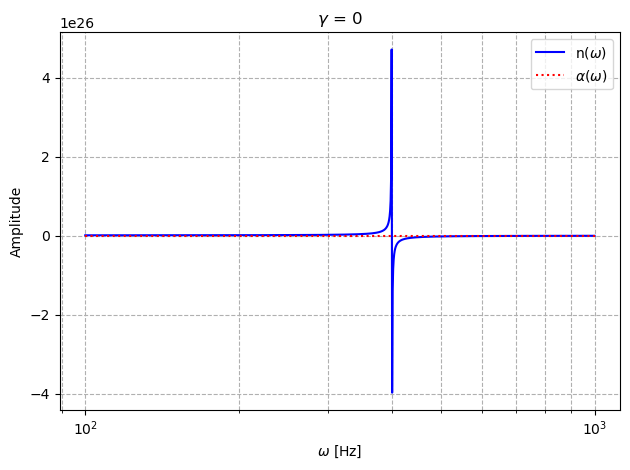

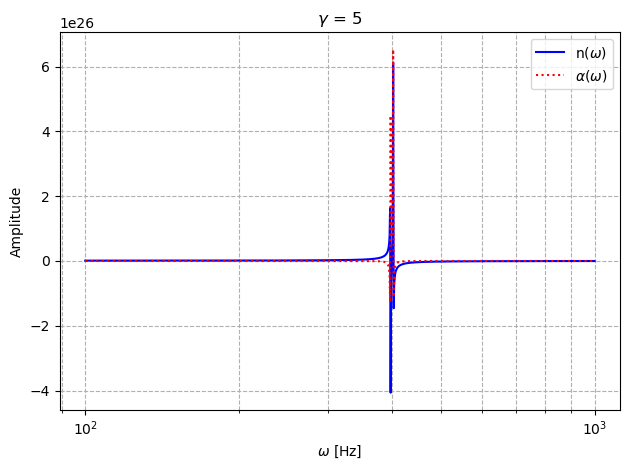

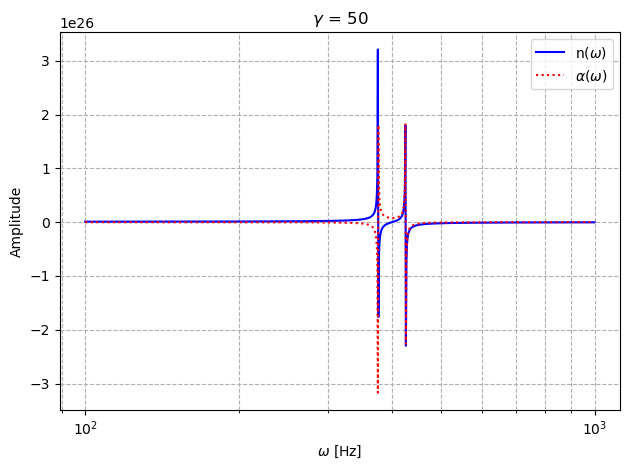

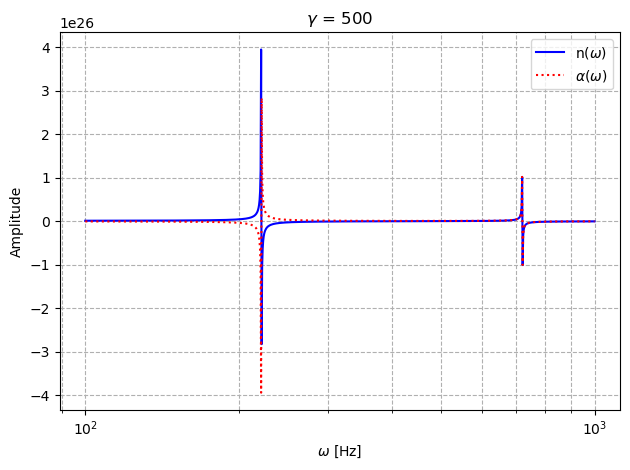

282.84271247461896


In [ ]:
"""Question 1"""

# Parameters
omega_0 = 4e2     # Resonance frequency (Hz)
y = 0.5          # Damping-like factor
N = 1e26              # Carrier density

# Frequency range
omega = np.logspace(2, 3, 1000)  # Extended to 10^6 for more dynamics

# Plotting
for y in (0,5,50,500):

    # calculate alpha & n at given energy decay rate, y:

    alpha = -0.5 * eV**2 * N*(omega*y) / ( ((omega_0**2 - omega**2)**2 - (omega*y)**2) * m_e * ep_0)
    n = 1 + 0.5 * eV**2 * N*(omega_0**2 - omega**2) / ( ((omega_0**2 - omega**2)**2 - (omega*y)**2) * m_e * ep_0)

    plt.figure()
    plt.plot(omega, n, color='blue', label='n($\\omega$)')
    plt.plot(omega, alpha, color='red', ls = ':', label='$\\alpha(\\omega)$')
    plt.xscale('log')
    plt.xlabel('$\\omega$ [Hz]')
    plt.ylabel('Amplitude')
    plt.title(f'$\\gamma$ = {y}')
    plt.legend()
    plt.grid(True, which='both', linestyle='--')
    #plt.xlim(300,500)
    plt.tight_layout()
    plt.show()

In [11]:
import sympy as sp
from sympy.interactive import printing
from sympy import lambdify

# Declare symbols & functions
t = sp.symbols('t', real = True)
Omega = sp.symbols('Omega', real = True)
gamma = sp.symbols('gamma', real = True)
gamma = 0
Delta = sp.symbols('Delta', real = True)
Delta = 0
i = sp.I  # imaginary unit
gg = sp.Function('gg')(t)
ge = sp.Function('ge')(t)
eg = sp.Function('eg')(t)
ee = sp.Function('ee')(t)


# Define the system of equations

ee_dt = sp.Eq(sp.Derivative(ee,t), -gamma*ee + 1/2*i*Omega*(ge - eg))
eg_dt = sp.Eq(sp.Derivative(eg,t), (-1/2*gamma - i*Delta)*eg + 1/2*i*Omega*(gg - ee))
ge_dt = sp.Eq(sp.Derivative(ge,t), (-1/2*gamma + i*Delta)*ge + 1/2*i*Omega*(ee - gg))
gg_dt = sp.Eq(sp.Derivative(gg,t), gamma*ee + 1/2*i*Omega*(ge - eg))

# Solve the system

ics = {gg.subs(t,0): 1, ee.subs(t,0): 0, eg.subs(t,0): 0, ge.subs(t,0): 0}
sol = sp.dsolve([ee_dt, eg_dt,ge_dt,gg_dt],[ee,eg,ge,gg], ics = ics)
sol

[Eq(ee(t), 0.25*Omega**2*t**2),
 Eq(eg(t), 0.5*I*Omega*t),
 Eq(ge(t), -0.5*I*Omega*t),
 Eq(gg(t), 0.25*Omega**2*t**2 + 1.0)]

In [ ]:
# consider in Matrix form to find eigens

import sympy as sp
from sympy.interactive import printing
from sympy import lambdify

t = sp.symbols('t', real = True)
Omega = sp.symbols('Omega', real = True)
gamma = sp.symbols('gamma', real = True)
gamma = 0
Delta = sp.symbols('Delta', real = True)
Delta = 0
i = sp.I  # imaginary unit
gg = sp.Function('gg')(t)
ge = sp.Function('ge')(t)
eg = sp.Function('eg')(t)
ee = sp.Function('ee')(t)

gg_dt = gamma*ee + 1/2*i*Omega*(eg - ge)
ge_dt = (-1/2*gamma + i*Delta)*ge + 1/2*i*Omega*(ee - gg)
eg_dt = (-1/2*gamma - i*Delta)*eg + 1/2*i*Omega*(gg - ee)
ee_dt =  -gamma*ee + 1/2*i*Omega*(ge - eg)

# Density matrix = [gg,ge],[eg,ee]
Density = sp.Matrix([ [gg_dt, ge_dt],
                      [eg_dt, ee_dt] ])


eigvecs = sp.simplify(Density.eigenvects())

sp.print_latex(eigvecs)

\left\{ - \Omega \sqrt{0.25 \left(\operatorname{ee}{\left(t \right)} - \operatorname{gg}{\left(t \right)}\right)^{2} - 0.25 \left(\operatorname{eg}{\left(t \right)} - \operatorname{ge}{\left(t \right)}\right)^{2}} : 1, \  \Omega \sqrt{0.25 \left(\operatorname{ee}{\left(t \right)} - \operatorname{gg}{\left(t \right)}\right)^{2} - 0.25 \left(\operatorname{eg}{\left(t \right)} - \operatorname{ge}{\left(t \right)}\right)^{2}} : 1\right\}

\left[ \left( - \Omega \left(0.25 \operatorname{ee}^{2}{\left(t \right)} - 0.5 \operatorname{ee}{\left(t \right)} \operatorname{gg}{\left(t \right)} - 0.25 \operatorname{eg}^{2}{\left(t \right)} + 0.5 \operatorname{eg}{\left(t \right)} \operatorname{ge}{\left(t \right)} - 0.25 \operatorname{ge}^{2}{\left(t \right)} + 0.25 \operatorname{gg}^{2}{\left(t \right)}\right)^{0.5}, \  1, \  \left[ \left[\begin{matrix}- \frac{\operatorname{ee}{\left(t \right)} - \operatorname{gg}{\left(t \right)}}{- i \left(\operatorname{ee}^{2}{\left(t \right)} - 2.0 \operatornam

In [20]:
rho_ee = sp.trigsimp(sol[0].rhs, method = 'combined')
rho_eg = sp.trigsimp(sol[1].rhs, method = 'combined')
rho_ge = sp.trigsimp(sol[2].rhs, method = 'combined')
rho_gg = sp.trigsimp(sol[3].rhs, method = 'combined')

sp.print_latex(rho_gg)
print()
sp.print_latex(rho_ge)
print()
sp.print_latex(rho_eg)
print()
sp.print_latex(rho_ee)

CoercionFailed: expected an integer, got 0.500000000000000

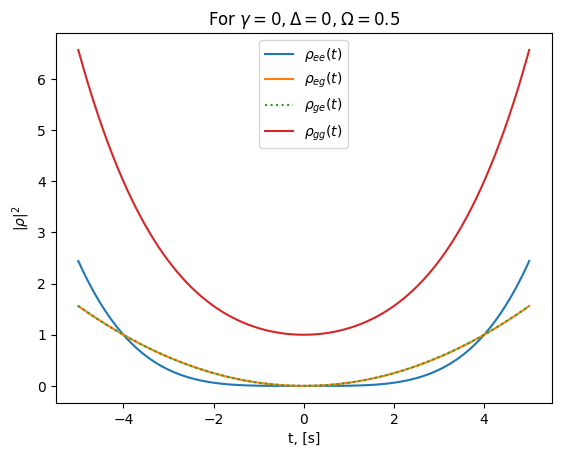

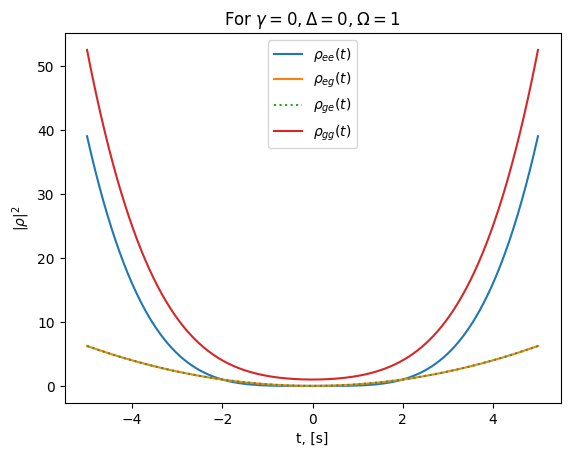

In [4]:
ee, eg, ge, gg = lambdify([t,Omega], sol[0].rhs), lambdify([t,Omega], sol[1].rhs), lambdify([t,Omega], sol[2].rhs), lambdify([t,Omega], sol[3].rhs)

t = np.linspace(-5,5,1000)

# Plotting
for i in (0.5,1):

    plt.plot(t,abs(ee(t,i))**2, label = '$\\rho_{ee}(t)$')
    plt.plot(t,abs(eg(t,i))**2, label = '$\\rho_{eg}(t)$')
    plt.plot(t,abs(ge(t,i))**2, ls = ':', label = '$\\rho_{ge}(t)$')
    plt.plot(t,abs(gg(t,i))**2, label = '$\\rho_{gg}(t)$')
    plt.xlabel('t, [s]')
    plt.ylabel('$|\\rho|^2$')
    plt.legend()
    plt.title(f'For $\\gamma = {0}, \\Delta = {0}, \\Omega = {i}$')
    plt.show()

In [409]:
from sympy import sin, cos
from sympy.abc import t
Omega = sp.symbols('Omega', real = True)
i = sp.I  # imaginary unit
Density = 1/2*sp.Matrix([ [1+cos(Omega*t), -I*sin(Omega*t)],[I*sin(Omega*t), 1-cos(Omega*t)] ])
eigvals = Density.eigenvals()
eigvecs = Density.eigenvects()
sp.pprint(eigvals)
print()
sp.pprint(eigvecs)
print(eigvecs)

{0: 1, 1.0: 1}

⎡⎛      ⎡⎡  ⅈ⋅sin(Ω⋅t)  ⎤⎤⎞  ⎛        ⎡⎡  ⅈ⋅sin(Ω⋅t)  ⎤⎤⎞⎤
⎢⎜      ⎢⎢──────────────⎥⎥⎟  ⎜        ⎢⎢──────────────⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢cos(Ω⋅t) + 1.0⎥⎥⎟, ⎜1.0, 1, ⎢⎢cos(Ω⋅t) - 1.0⎥⎥⎟⎥
⎢⎜      ⎢⎢              ⎥⎥⎟  ⎜        ⎢⎢              ⎥⎥⎟⎥
⎣⎝      ⎣⎣     1.0      ⎦⎦⎠  ⎝        ⎣⎣     1.0      ⎦⎦⎠⎦
[(0, 1, [Matrix([
[I*sin(Omega*t)/(cos(Omega*t) + 1.0)],
[                                1.0]])]), (1.00000000000000, 1, [Matrix([
[I*sin(Omega*t)/(cos(Omega*t) - 1.0)],
[                                1.0]])])]


In [17]:
from sympy.abc import A,B

t = sp.symbols('t', real = True)
U = sp.symbols('U', real = True)
Ng = sp.Function('Ng')(t)
Ne = sp.Function('Ne')(t)

Ng_dt = sp.Eq(sp.Derivative(Ng,t), -A*Ne + B*U*(Ng-Ne))
Ne_dt = sp.Eq(sp.Derivative(Ne,t), +A*Ne - B*U*(Ng-Ne))

ics = {Ng.subs(t,0): 1, Ne.subs(t,0): 0}
sol = sp.dsolve([Ng_dt,Ne_dt],[Ng,Ne], ics = ics)
sol

[Eq(Ng(t), B*U*exp(t*(A + 2*B*U))/(A + 2*B*U) + (A + B*U)/(A + 2*B*U)),
 Eq(Ne(t), -B*U*exp(t*(A + 2*B*U))/(A + 2*B*U) + B*U/(A + 2*B*U))]

In [18]:
Ng, Ne = lambdify([t,U], sol[0].rhs), lambdify([t,U], sol[1].rhs)
t = np.linspace(-5,5,1000)

# Plotting

plt.plot(t,Ng(t,0.5), label = '$N_g(t)$')
plt.plot(t,Ne(t,0.5), label = '$N_e(t)$')
plt.xlabel('t, [s]')
plt.ylabel('N(t)')
plt.legend()
plt.title(f'For $\\gamma = 0, \\Delta = 0, \\Omega = {i}$')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type Add which has no callable exp method